In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log

In [2]:
dataset = pd.read_csv("airline_passengers.csv")
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
dataset.set_index('Month', inplace=True)

In [7]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

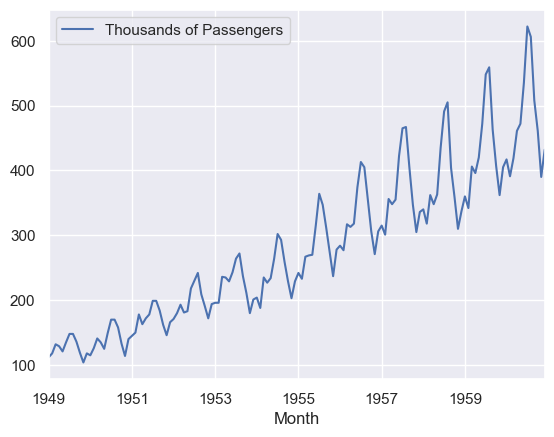

In [8]:
dataset.plot()

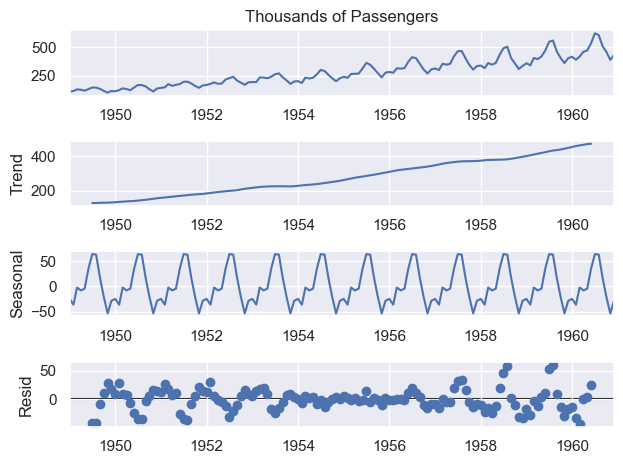

In [9]:
# Decomposition to check dataset component 
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dataset['Thousands of Passengers'], model='additive',period=12)
decompose.plot()
plt.show()

# Check autocorrelation part - Durbin Watson Test

In [10]:
import statsmodels.api as sm

In [11]:
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

# Check Data is Stationary or Non-Stationary

# Augmented Dickey Fuller Test

In [12]:
# Augmented Dickey Fuller Test - check data stationiarity 
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [25]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [26]:
check_adftest(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->0.8153688792060482
P-Value :-->0.991880243437641
#Lags :-->13
No. of Observation :-->130
Weak Evidence against null hypothesis and my times series is non-stationary


In [16]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [17]:
dataset.head(10)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [27]:
check_adftest(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-2.8292668241699994
P-Value :-->0.0542132902838255
#Lags :-->12
No. of Observation :-->130
Weak Evidence against null hypothesis and my times series is non-stationary


In [19]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [20]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [28]:
check_adftest(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-16.384231542468505
P-Value :-->2.7328918500142407e-29
#Lags :-->11
No. of Observation :-->130
Strong evidence against null hypothesis and my time series is Stationary


In [22]:
# parameter - p d q (Trend)
# d = 2

In [23]:
# calculating seasonality
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [24]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [31]:
check_adftest(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-3.383020726492481
P-Value :-->0.011551493085514952
#Lags :-->1
No. of Observation :-->130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# Trend:
### p :
### d : 2
### q :

# Seasonality
### P :
### D : 1
### Q : 

## How to calcualte parameter p/P and q/Q
### Ans : p stand for "partial autocorrelation" and we have to use autoregressive method and q we have calcualted basis moving avg and it is also called autocorrelation


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

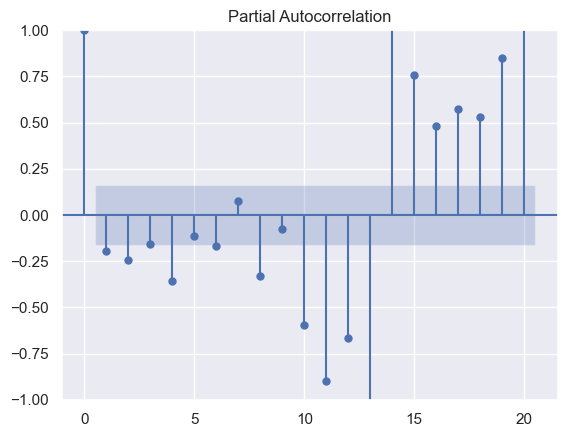

In [33]:
# p and P value
# p : Tend
plot_pacf(dataset['2nd Diff'].dropna(),lags=20)
plt.show()

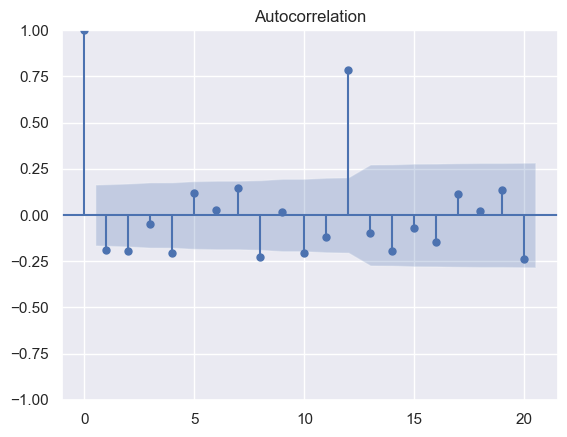

In [34]:
# q: Tend
plot_acf(dataset['2nd Diff'].dropna(),lags=20)
plt.show()

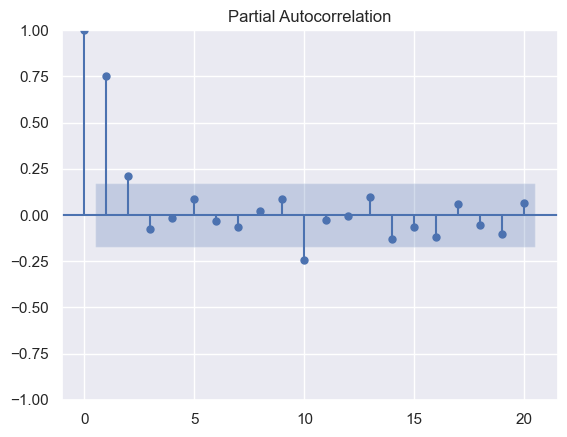

In [35]:
# P : Seasonality
plot_pacf(dataset['Seasonality'].dropna(),lags=20)
plt.show()

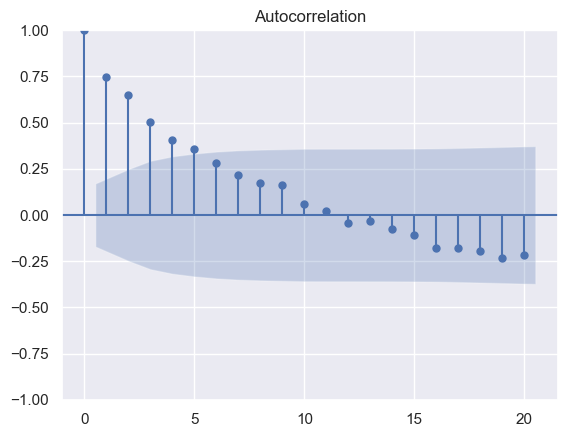

In [36]:
# Q : Seasonality
plot_acf(dataset['Seasonality'].dropna(),lags=20)
plt.show()

In [ ]:
# Trend:
### p : 4
### d : 2
### q : 2

# Seasonality
### P : 2
### D : 1
### Q : 5

# Building Time Series Forecasting Model - ARIMA

In [38]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [44]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order=(4, 2, 2),
                                 seasonal_order=(2,1,1,12))

result = model.fit()
print(result.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.782
Date:                              Sun, 25 Feb 2024   AIC                           1015.563
Time:                                      11:22:44   BIC                           1044.239
Sample:                                  01-01-1949   HQIC                          1027.215
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3590      0.097    -14.018      0.000      -1.549      -1.169
ar.L2         -0.49

In [ ]:
# AIC : 1021.453 : (4, 2, 2)x(2, 1, 5, 12)
# AIC : 1020.040 : (4, 2, 2)x(2, 1, 4, 12)
# AIC : 1018.314 : (4, 2, 2)x(2, 1, 3, 12)
# AIC : 1017.565 : (4, 2, 2)x(2, 1, 2, 12)
# AIC : 1015.563 : (4, 2, 2)x(2, 1, 1, 12) **** This one is the best 

In [45]:
dataset.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [46]:
len(dataset)

144

In [59]:
dataset['Forecast'] = result.predict(start=130, end=144, dynamic=True)

In [60]:
dataset.tail(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1959-05-01,420,24.0,34.0,57.0,NaN
1959-06-01,472,52.0,28.0,37.0,NaN
1959-07-01,548,76.0,24.0,57.0,NaN
1959-08-01,559,11.0,-65.0,54.0,NaN
1959-09-01,463,-96.0,-107.0,59.0,NaN
1959-10-01,407,-56.0,40.0,48.0,NaN
1959-11-01,362,-45.0,11.0,52.0,355.669912
1959-12-01,405,43.0,88.0,68.0,388.270431
1960-01-01,417,12.0,-31.0,57.0,404.234919


<AxesSubplot:xlabel='Month'>

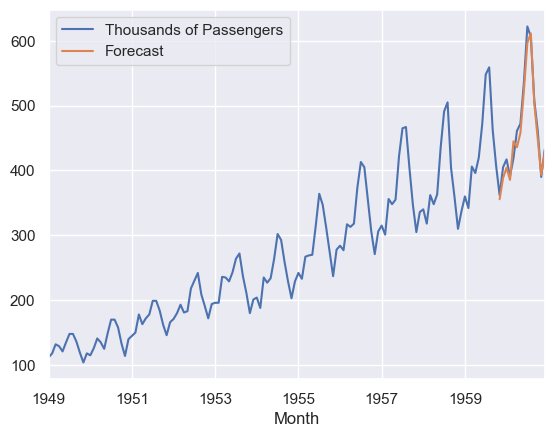

In [61]:
dataset[['Thousands of Passengers','Forecast']].plot()

# automation approach

In [62]:
import itertools

In [63]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q)) # Trend
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq] # seasonality

print("Check few parameter combinations are :")
print('{} x {}'.format(pdq[0], seasonal_pdq[0]))
print('{} x {}'.format(pdq[0], seasonal_pdq[1]))
print('{} x {}'.format(pdq[0], seasonal_pdq[2]))
print('{} x {}'.format(pdq[1], seasonal_pdq[0]))
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[0]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Check few parameter combinations are :
(0, 0, 0) x (0, 0, 0, 12)
(0, 0, 0) x (0, 0, 1, 12)
(0, 0, 0) x (0, 1, 0, 12)
(0, 0, 1) x (0, 0, 0, 12)
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 0, 0, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [64]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                              order=param,seasonal_order=param_seasonal,
                                              enforce_stationarity=False, enforce_invertibility=False)
            result = model.fit()
            print("ARIMA{}x{} - AIC:{}".format(param, param_seasonal, result.aic))
        except:
            continue                                            
            

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequ

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.1905684323885
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.2914901508534
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043230014
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445113


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730364


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571512


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.991631232203
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.998361439992


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044342


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026809539418


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801411946777


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290455


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478031656
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.7130010979715
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833936


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380582
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661916


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347579855
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:944.487630115843


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654337
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072924


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759201
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1006.7919047397327


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604677


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825341


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362335539064


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:934.797542574912


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.319297498902
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequ

ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1205.3907786172604
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1029.977309170144


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533144


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1017.3155493559243


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272557895192


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660823972


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:945.4400866836645
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414932


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1192.2949631619501
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824624362


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892183


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017287441


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764737563168


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:935.8163348218442


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:935.9152860554813
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1190.534292907646
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838165


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305582


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1007.6496486407449


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249453387
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:927.5904374710286


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:928.1418620185451


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1377.2926858930787


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1185.334035969223
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1008.5528813487495


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:922.4148960116271


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100683346


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264688055


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:929.5756208330631


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352037


In [ ]:
# ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604677

In [65]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(0,1,1),
                                  seasonal_order=(0,1,1,12),
                                  enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()
print(result.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -457.315
Date:                            Sun, 25 Feb 2024   AIC                            920.631
Time:                                    12:23:18   BIC                            928.917
Sample:                                01-01-1949   HQIC                           923.995
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3175      0.073     -4.342      0.000      -0.461      -0.174
ma.S.L12      -0.1123      0.097   

<AxesSubplot:xlabel='Month'>

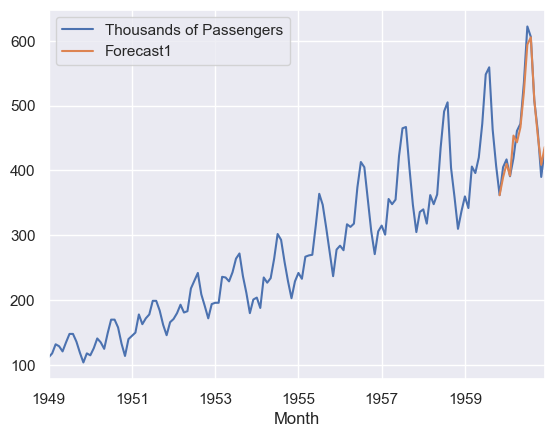

In [66]:
dataset['Forecast1'] = result.predict(start=130, end=144, dynamic=True)
dataset[['Thousands of Passengers','Forecast1']].plot()

In [67]:
# Forecast passenger details for 10 years

In [68]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
Month,,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.529010,605.202758
1960-09-01,508,-98.0,-82.0,45.0,503.462690,509.141168
1960-10-01,461,-47.0,51.0,54.0,448.467350,454.238084
1960-11-01,390,-71.0,-24.0,28.0,393.192119,408.707968
1960-12-01,432,42.0,113.0,27.0,426.489891,436.213475


In [69]:
from pandas.tseries.offsets import DateOffset

In [71]:
future_date = [dataset.index[-1] + DateOffset(months=x) for x in range(0,121)]

In [70]:
dataset.index[-1]

Timestamp('1960-12-01 00:00:00')

In [72]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [73]:
future_dates_df = pd.DataFrame(index=future_date[1:], columns=dataset.columns)

In [77]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
Month,,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.529010,605.202758
1960-09-01,508,-98.0,-82.0,45.0,503.462690,509.141168
1960-10-01,461,-47.0,51.0,54.0,448.467350,454.238084
1960-11-01,390,-71.0,-24.0,28.0,393.192119,408.707968
1960-12-01,432,42.0,113.0,27.0,426.489891,436.213475


In [80]:
len(dataset)

144

In [81]:
len(future_dates_df)

120

In [78]:
future_dates_df.tail(120)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1970-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
final_date = pd.concat([dataset, future_dates_df])

In [83]:
len(final_date)

264

In [85]:
final_date.tail(125)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
1960-08-01,606,-16.0,-103.0,47.0,611.529010,605.202758
1960-09-01,508,-98.0,-82.0,45.0,503.462690,509.141168
1960-10-01,461,-47.0,51.0,54.0,448.467350,454.238084
1960-11-01,390,-71.0,-24.0,28.0,393.192119,408.707968
1960-12-01,432,42.0,113.0,27.0,426.489891,436.213475
...,...,...,...,...,...,...
1970-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-11-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

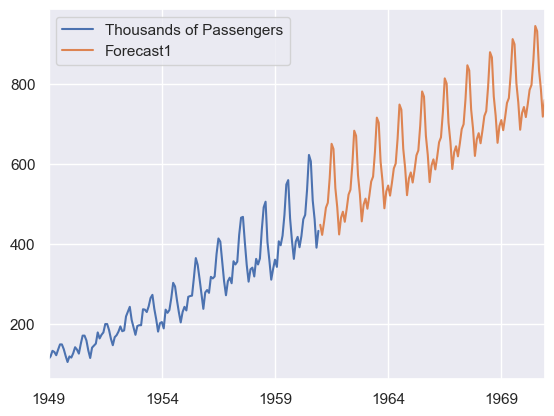

In [86]:
# Predict future passenger details and visualize it for understanding purpose

final_date['Forecast1'] = result.predict(start=144, end=264, dynamic=True)
final_date[['Thousands of Passengers', 'Forecast1']].plot()

In [87]:
final_date.tail(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
1969-05-01,NaN,NaN,NaN,NaN,NaN,764.242797
1969-06-01,NaN,NaN,NaN,NaN,NaN,826.250881
1969-07-01,NaN,NaN,NaN,NaN,NaN,911.744977
1969-08-01,NaN,NaN,NaN,NaN,NaN,898.795308
1969-09-01,NaN,NaN,NaN,NaN,NaN,801.012929
1969-10-01,NaN,NaN,NaN,NaN,NaN,753.125668
1969-11-01,NaN,NaN,NaN,NaN,NaN,685.005215
1969-12-01,NaN,NaN,NaN,NaN,NaN,726.922190
1970-01-01,NaN,NaN,NaN,NaN,NaN,741.866648
1970-02-01,NaN,NaN,NaN,NaN,NaN,716.726761


In [88]:
final_date.to_csv("Final_forecasting_output.csv")

# AutoArima model

In [89]:
!pip install pmdarima


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from pmdarima import auto_arima

In [91]:
mydata = pd.read_csv("airline_passengers.csv")

In [93]:
mydata['Month'] = pd.to_datetime(mydata['Month'])

In [94]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [95]:
mydata.set_index('Month', inplace=True)

In [96]:
mydata.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [97]:
model = auto_arima(mydata, seasonal=True, m=12)

In [98]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 25 Feb 2024   AIC                           1017.847
Time:                                     12:47:51   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

# *******************************#

In [101]:
dataset.tail(14)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
Month,,,,,,
1959-11-01,362,-45.0,11.0,52.0,355.669912,361.798306
1959-12-01,405,43.0,88.0,68.0,388.270431,389.303813
1960-01-01,417,12.0,-31.0,57.0,404.234919,410.230434
1960-02-01,391,-26.0,-38.0,49.0,385.410977,391.891692
1960-03-01,419,28.0,54.0,13.0,444.906052,453.763015
1960-04-01,461,42.0,14.0,65.0,435.758473,443.396015
1960-05-01,472,11.0,-31.0,52.0,457.770114,466.281390
1960-06-01,535,63.0,52.0,63.0,522.638549,520.446116
1960-07-01,622,87.0,24.0,74.0,596.634554,594.032606


In [102]:
dataset1 = dataset.copy()

In [103]:
dataset1.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast,Forecast1
Month,,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.529010,605.202758
1960-09-01,508,-98.0,-82.0,45.0,503.462690,509.141168
1960-10-01,461,-47.0,51.0,54.0,448.467350,454.238084
1960-11-01,390,-71.0,-24.0,28.0,393.192119,408.707968
1960-12-01,432,42.0,113.0,27.0,426.489891,436.213475


In [104]:
dataset1 = dataset1[['Thousands of Passengers','Forecast1']]

In [105]:
dataset1

,Thousands of Passengers,Forecast1
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,605.202758
1960-09-01,508,509.141168
1960-10-01,461,454.238084


In [106]:
dataset1 = dataset1.iloc[130:, :]

In [107]:
dataset1

,Thousands of Passengers,Forecast1
Month,,
1959-11-01,362,361.798306
1959-12-01,405,389.303813
1960-01-01,417,410.230434
1960-02-01,391,391.891692
1960-03-01,419,453.763015
1960-04-01,461,443.396015
1960-05-01,472,466.281390
1960-06-01,535,520.446116
1960-07-01,622,594.032606


In [108]:
actual_values = dataset1['Thousands of Passengers']
predicted_values = dataset1['Forecast1']

In [109]:
# calculate MAPE
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [110]:
mape = calculate_mape(actual_values, predicted_values)
print("MAPE :", mape)

MAPE : 2.4229727198386724


In [ ]:
# END *****************

# Home Work : Beer Australia.csv